In [1]:
# if this line is not separated from the line below this cell has to be executed twice
# Jupyter Notebook with widget matplotlib plots
%matplotlib notebook
# Jupyter Lab with widget matplotlib plots
#%matplotlib widget 
# with Jupyter and Jupyter Lab but without widget matplotlib plots
#%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import pyicon as pyic  
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
import numpy as np
from netCDF4 import Dataset
import cartopy.crs as ccrs
import seawater as sw
import xarray as xr
import matplotlib.pyplot as plt
import glob
from matplotlib.collections import PatchCollection
from matplotlib.collections import PolyCollection

-----calc
sys glob os
numpy
netcdf
Done modules calc.
-----calc_xr
sys glob os
numpy
netcdf
xarray
Done modules calc.
-----tb
sys
json
numpy
scipy
netcdf datetime
matplotlib
mybreak
pnadas
xarray
done xarray
-----IconData
-----plotting
-----view
-----calc
-----calc_xr
-----tb
-----IconData
-----plotting
-----view
-----quickplots
-----quickplots


In [3]:
class Simulation(object):
    def __init__(self):
        return

In [19]:
# runs = ['nib1903_zlev_sft12', 'nib1904_zstar_sft12']
# runs = ['nib1905_zlev_sft14', 'nib1906_zstar_sft14']
# runs = ['nib1907_zlev_sft15', 'nib1908_zstar_sft15']
# runs = ['nib1906_zstar_sft14', 'nib1908_zstar_sft15']
# runs = ['nib1904_zstar_sft12', 'nib1908_zstar_sft15']
# runs = ['nib1902_slo', 'nib1910_zstar_sft12']
runs = ['nib1915_zlev_sft1', 'nib1917_zstar_sft14']

In [20]:
%%time

Sims = dict()

S = Simulation()
S.run = runs[0]
S.path_data = f'/home/mpim/m300602/work/proj_vmix/icon/icon_19/icon-oes_zstar3_torus/experiments/{S.run}/'
S.ds = xr.open_mfdataset(f'{S.path_data}/{S.run}_inst_*.nc')
Sims[S.run] = S

S = Simulation()
S.run = runs[1]
S.path_data = f'/home/mpim/m300602/work/proj_vmix/icon/icon_19/icon-oes_zstar3_torus/experiments/{S.run}/'
# S.ds = xr.open_mfdataset(f'{S.path_data}/{S.run}_inst_*.nc')
S.ds = xr.open_dataset(f'{S.path_data}/{S.run}_inst_20200120T000000Z.nc')
Sims[S.run] = S

CPU times: user 89 ms, sys: 104 ms, total: 193 ms
Wall time: 524 ms


In [21]:
%%time
for run in Sims:
    S = Sims[run]
    print(S.run)
    S.ds = S.ds.compute()

nib1915_zlev_sft1
nib1917_zstar_sft14
CPU times: user 17.3 s, sys: 6.61 s, total: 23.9 s
Wall time: 48.4 s


In [22]:
%%time
for run, S in Sims.items():
    S.ds['ke'] = 0.5*(S.ds['u']**2+S.ds['u']**2)

CPU times: user 78 ms, sys: 135 ms, total: 213 ms
Wall time: 209 ms


In [23]:
%%time
ds = Sims[runs[1]].ds - Sims[runs[0]].ds

CPU times: user 169 ms, sys: 339 ms, total: 508 ms
Wall time: 504 ms


In [24]:
# fig = plt.figure()
# ax = plt.axes()
hca, hcb = pyic.arrange_axes(3,3, plot_cb=False, asp=0.8, fig_size_fac=1.5, sharex=False, sharey=False)
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
ds.u.isel(depth_2=0, ncells=10).plot(ax=ax, label='u')
ds.v.isel(depth_2=0, ncells=10).plot(ax=ax, label='v')
ax.legend()

ii+=1; ax=hca[ii]; cax=hcb[ii]
ds.to.isel(depth_2=0, ncells=10).plot(ax=ax, label='u')

ii+=1; ax=hca[ii]; cax=hcb[ii]
ds.so.isel(depth_2=0, ncells=10).plot(ax=ax, label='u')

ii+=1; ax=hca[ii]; cax=hcb[ii]
ds.zos.isel(ncells=10).plot(ax=ax)

# ii+=1; ax=hca[ii]; cax=hcb[ii]
# ds.atmos_fluxes_stress_xw.isel(ncells=10).plot(ax=ax, label='taux')
# ds.atmos_fluxes_stress_yw.isel(ncells=10).plot(ax=ax, label='tauy', linestyle='--')
# # ds.atmos_fluxes_stress_xw.isel(ncells=11).plot(ax=ax, label='taux2')
# # ds.atmos_fluxes_stress_yw.isel(ncells=11).plot(ax=ax, label='tauy2')
# ax.legend()

ii+=1; ax=hca[ii]; cax=hcb[ii]
ds.ke.isel(depth_2=0, ncells=10).plot(ax=ax, label='u')

ii+=1; ax=hca[ii]; cax=hcb[ii]
ds.HeatFlux_Total.isel(ncells=10).plot(ax=ax)

ii+=1; ax=hca[ii]; cax=hcb[ii]
ds.FrshFlux_TotalOcean.isel(ncells=10).plot(ax=ax)

for ax in hca:
    ax.grid(True)
    ax.set_title('')
    ax.set_xlabel('')

<IPython.core.display.Javascript object>

In [25]:
dt = (ds.time-ds.time[0]).astype(float)/86400/1e9

In [26]:
# dz = ds.depth.diff(dim='depth').rename(depth='depth_2')#.data[np.newaxis,:,np.newaxis]
# dz['depth_2'] = ds.depth_2
# area = ds_tg.cell_area.rename(cell='ncells')

# vol = area*dz
# vol = vol.transpose()

In [27]:
# # fig = plt.figure()
# hca, hcb = pyic.arrange_axes(2,3, plot_cb=False, asp=0.8, fig_size_fac=1.5, sharex=False, sharey=False)
# ii=-1

# tvol = vol.sum()

# ii+=1; ax=hca[ii]; cax=hcb[ii]
# # a = (ds.so*dz).isel(ncells=nc).sum(dim='depth_2')
# a = (ds.so*vol).sum(dim=['ncells', 'depth_2'])#/vol.sum()
# # a = (ds.so*vol).isel(depth_2=2).sum(dim=['ncells'])
# a = a.where(a!=0)
# a.plot(ax=ax)

# for k in [10,20,30,50]:
#     ii+=1; ax=hca[ii]; cax=hcb[ii]
#     b = (ds.so*area).isel(depth_2=k).sum(dim=['ncells'])/area.sum()
#     b = b.where(b!=0)
#     b.plot(ax=ax, label=k)
#     ax.legend()

# for ax in hca:
#     ax.grid(True)

In [28]:
# ds.to.isel(ncells=nc, time=1)

<IPython.core.display.Javascript object>


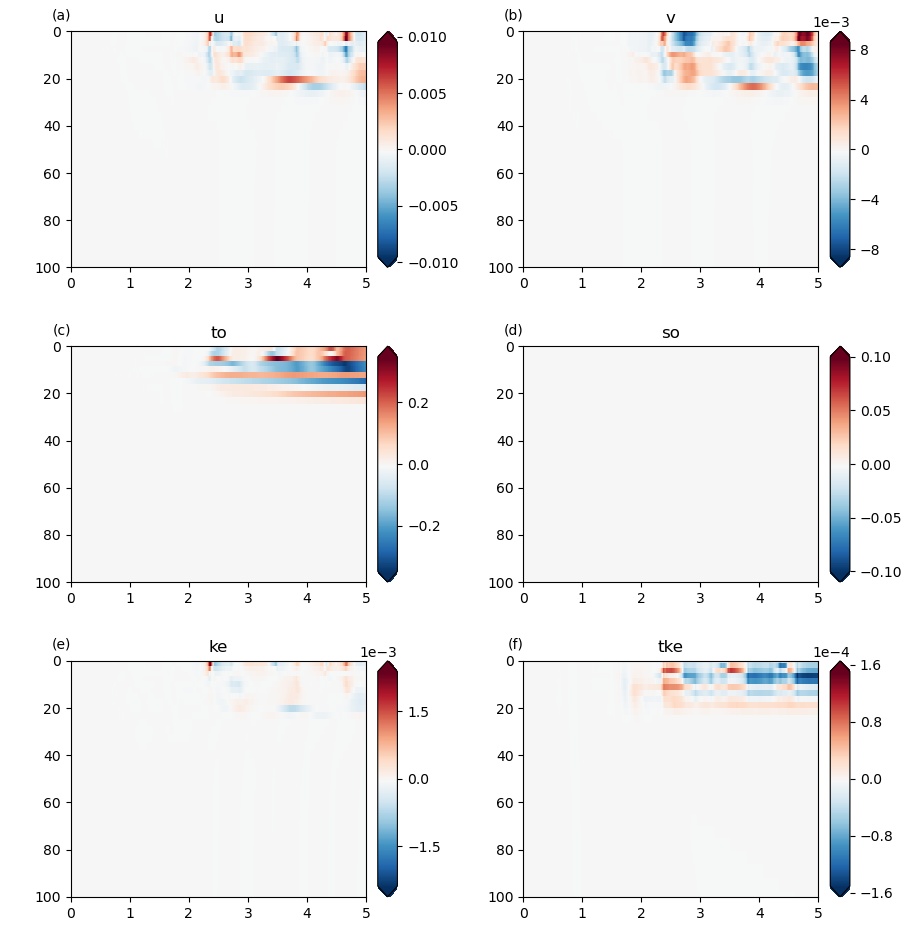

In [29]:
hca, hcb = pyic.arrange_axes(2,3, plot_cb=True, asp=0.8, fig_size_fac=1.5, sharex=False, sharey=False)
ii=-1

nc = 10

Dclim = dict(
u='sym',
v='sym',
to='sym',
so='sym',
ke='sym',
tke='sym',
)

for var in ['u', 'v', 'to', 'so', 'ke']:
    ii+=1; ax=hca[ii]; cax=hcb[ii]
    pyic.shade(dt, ds.depth_2, ds[var].isel(ncells=nc).transpose(), ax=ax, cax=cax, clim=Dclim[var])
    ax.set_title(var)
    
for var in ['tke']:
    ii+=1; ax=hca[ii]; cax=hcb[ii]
    pyic.shade(dt, ds.depth, ds[var].isel(ncells=nc).data.transpose(), ax=ax, cax=cax, clim=Dclim[var])
    ax.set_title(var)

for ax in hca:
    ax.set_ylim(100,0)